## Data Analysis of Avocado Price

### Introduction to the data

This dataset is taken from kaggle (https://www.kaggle.com/neuromusic/avocado-prices ) which sourced by website Hass Avocaco Board (https://hassavocadoboard.com).

This is how the data is describe:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

`Date` - The date of the observation
`AveragePrice` - the average price of a single avocado
`type` - conventional or organic
`year` - the year
`Region` - the city or region of the observation
`Total Volume` - Total number of avocados sold
`4046` - Total number of avocados with PLU 4046 sold (Small Hass)
`4225` - Total number of avocados with PLU 4225 sold (Large Hass)
`4770` - Total number of avocados with PLU 4770 sold (Extra Large Hass)



### Load Data

In [1]:
#import all the libraries use in this analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
#the data is a csv file
df_raw = pd.read_csv('avocado.csv')
df_raw.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


There are a total of 18249 entries in this dataset containing 14 columns. No missing values are found in neither column. 

In [4]:
df_raw.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### Data Cleaning

There are a few steps of data cleaning need to be done in this dataset as listed below:

1. Remove unname column 
2. change date datatype to datetime
3. `total volume,4046,4225` and `4770` shouldn't be in decimal because represent the number of avocados. Should be discrete type of data

#### 1. Remove unwanted column

There are some other columns that exist in this dataset which are not described by the Hass Avocado Board and they are `Unnamed`,`Total Bags`,`Small Bags`,`Large Bags` and `XLarge Bags`. Since these columns are not my main concern in this dataset, I decided to removed them.

In [5]:
#make a dataset copy. So any changes is done to the copied dataframe
df=df_raw.copy()

In [6]:
#dropping the unwanted columns
_=['Unnamed: 0','Total Bags','Small Bags','Large Bags','XLarge Bags']

for cname in _:
    df.drop(columns=cname,inplace=True)
   

So the dataset we have now looks like below:

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


#### 2. Change datatype `Date` to datetime and `total volume`,`4046`,`4225` and `4770` to integer

Firstly, I changed the `Date` from **int64** to **datetime** datatype as below:

In [8]:
df.Date=pd.to_datetime(df.Date)

Next the following columns in `_` variable are changed into **int** since they are the unit of avocado. If doesn't make sense if this value is in decimal. 

In [9]:
cols=['Total Volume','4046','4225','4770']

for cname in cols:
    df[cname]=df[cname].abs().astype('int')

So the final cleaned dataframe look like this:

In [10]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236,1036,54454,48,conventional,2015,Albany
1,2015-12-20,1.35,54876,674,44638,58,conventional,2015,Albany
2,2015-12-13,0.93,118220,794,109149,130,conventional,2015,Albany
3,2015-12-06,1.08,78992,1132,71976,72,conventional,2015,Albany
4,2015-11-29,1.28,51039,941,43838,75,conventional,2015,Albany


### EDA
Main objective in this part os to determine if there are any sort of patterns in our data.

What I intend to explore here are as below:

1. Explore the distibution and correlation of variables
2. find any interesting trends?
3. Does volume has any impact on the avocado price?

#### Distribution and Correlations of variables `AveragePrice`,`Total Volumn`, all three different `PLU` types` using Seaborn pairplots

In [11]:
#sns.set_style('darkgrid')
%matplotlib inline

Using Pearson correlation which measure the linear correlation between two variables X and Y. 
* find the features that has high correlation value with AveragePrice (closer to +1 or -1)

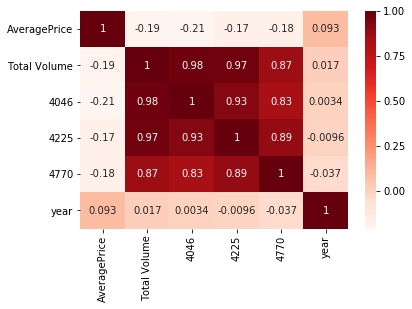

In [12]:
cor=df.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.Reds)
plt.show()

None of them are highly correlate with AveragePrice. Let's see how they are correlate within scatterplots because sometimes non linear correlation is more visible using scatterplots. We use pairplot for this purpose because we can see all the plots in one diagram.

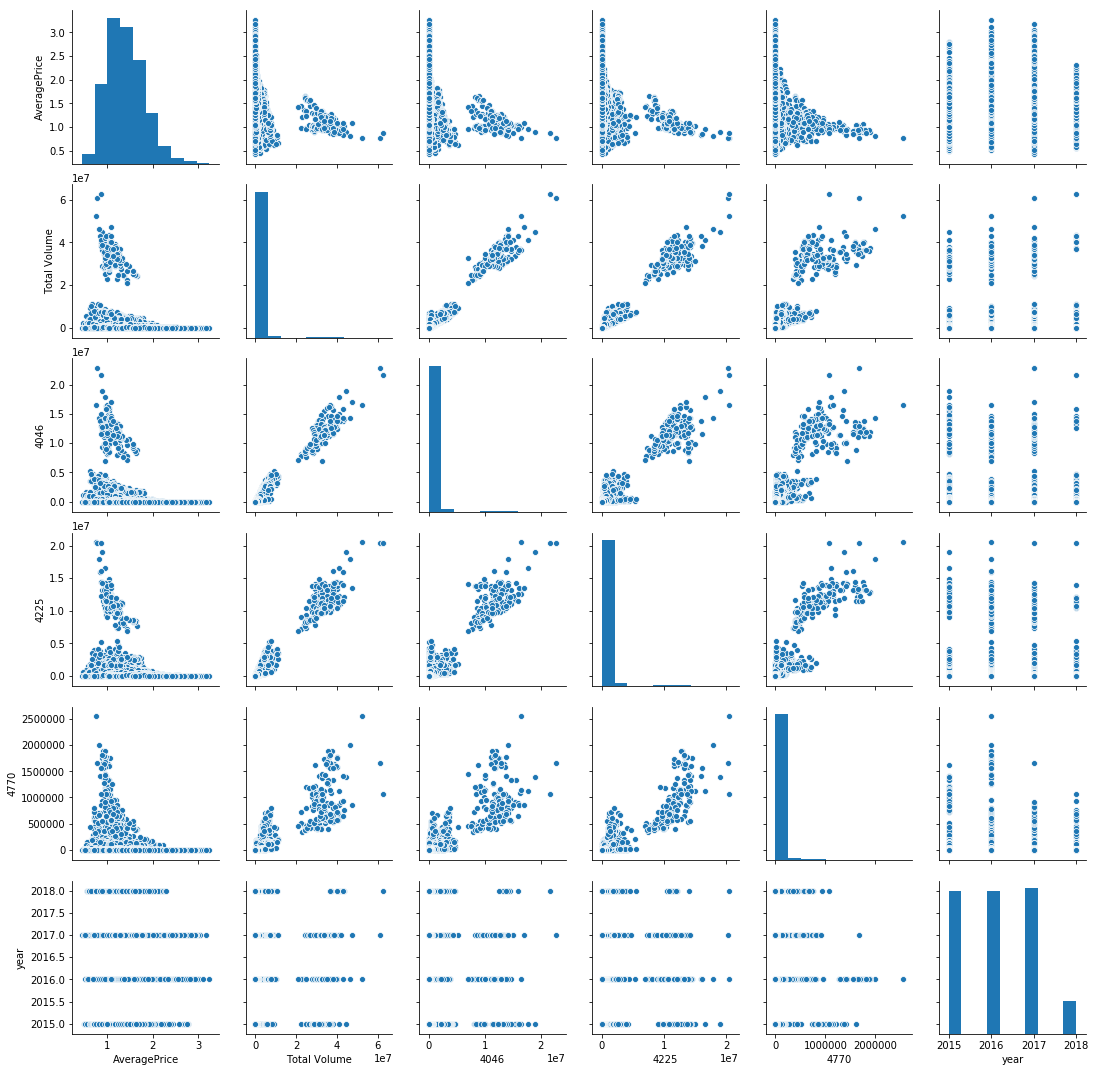

In [13]:
sns.pairplot(df);

 * Most of the scatter plot seems to have 2 clusters. Is this represented by the type of avocado(organic and conventional)? lets plot again with type being the hue. 
 * why 2018 

/usr/local/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


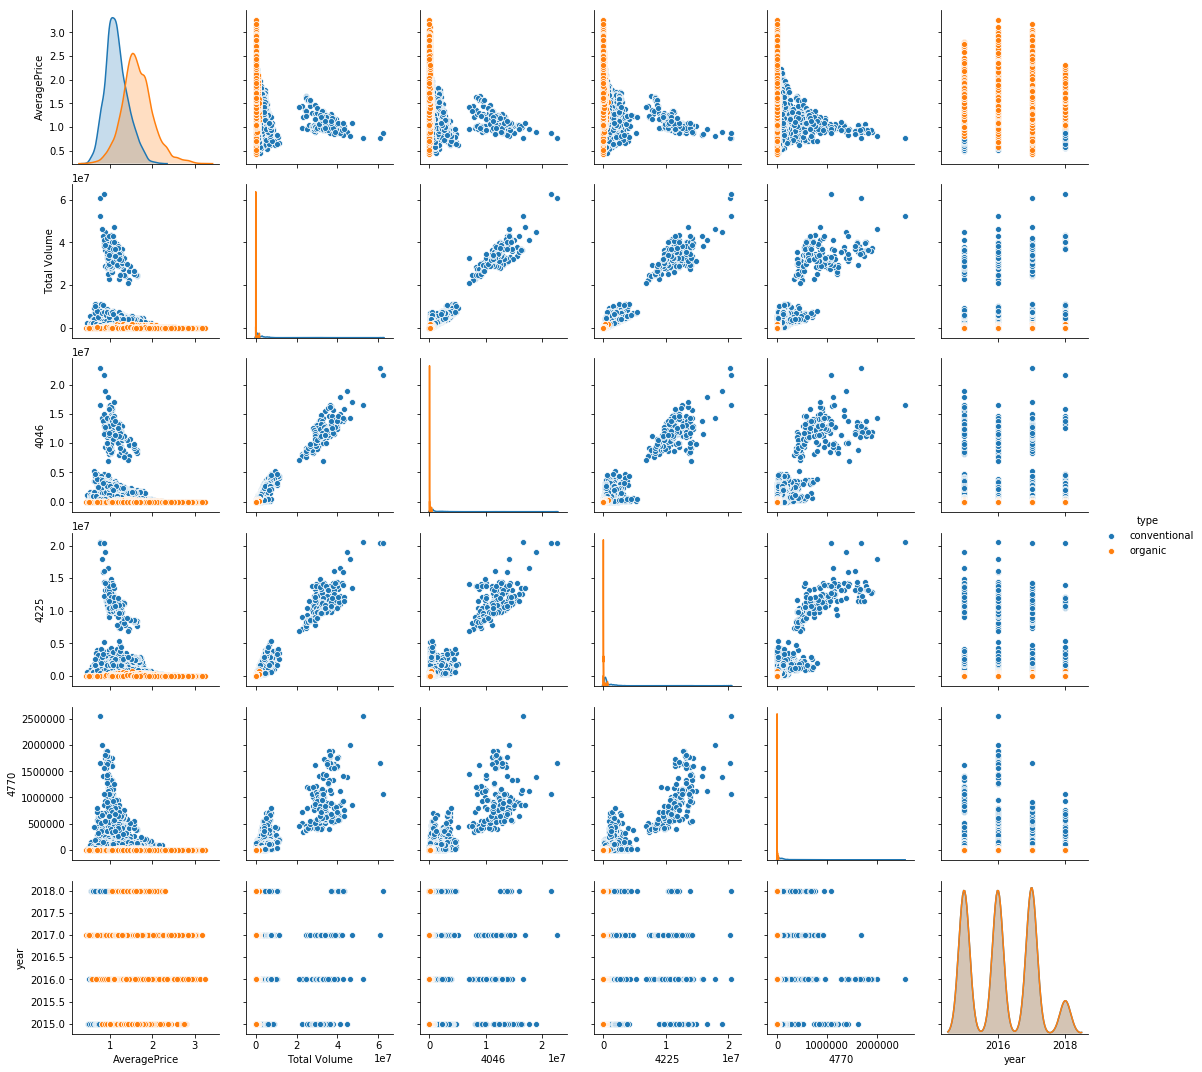

In [14]:
sns.pairplot(df, hue='type');

type is not the cause of the clusters in the scatter plot. Maybe its a standard of volumn of avocado number sold in the market?

Further analysis will be:

1. Since price is our dependent variable, we will try to uncover the price distribution closer
2. How price changes for different type of avocado?
3. To see the avocado's demand from year to year
4. Is there any particular season that people love to eat avocado?

### Data Analysis and Visualisation

#### Average Price distribution

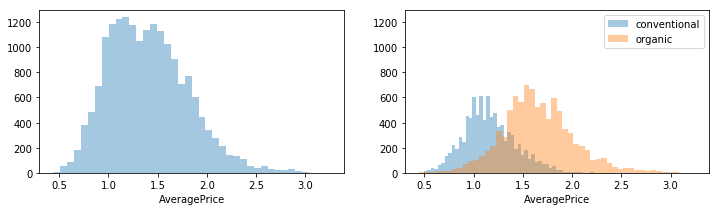

In [15]:
x2_a=df[df['type']=='conventional'].AveragePrice
x2_b=df[df['type']=='organic'].AveragePrice

plt.figure(figsize=[12,3])

plt.subplot(1,2,1)
x=df.AveragePrice
ax1= sns.distplot(x,bins=40,kde=False)

plt.subplot(1,2,2,sharey=ax1)
ax2= sns.distplot(x2_a,label='conventional',kde=False)
ax3= sns.distplot(x2_b,label='organic',kde=False)
plt.legend()
plt.show()


* bi-model with right skewed
* organic avocado shifted to the right in the plot, shows higher price and more right skewed than conventional avocado

#### Price changes for different type of avocado

In [16]:
import statsmodels.api as sm

In [17]:
df[['conventional','organic']]=pd.get_dummies(df.type)
#df=df.drop('type',axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,conventional,organic
0,2015-12-27,1.33,64236,1036,54454,48,conventional,2015,Albany,1,0
1,2015-12-20,1.35,54876,674,44638,58,conventional,2015,Albany,1,0
2,2015-12-13,0.93,118220,794,109149,130,conventional,2015,Albany,1,0
3,2015-12-06,1.08,78992,1132,71976,72,conventional,2015,Albany,1,0
4,2015-11-29,1.28,51039,941,43838,75,conventional,2015,Albany,1,0


In [18]:
df['intercept']=1
lm=sm.OLS(df['AveragePrice'],df[['intercept','organic']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Fri, 09 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:04:48   Log-Likelihood:                -4943.0
No. Observations:               18249   AIC:                             9890.
Df Residuals:                   18247   BIC:                             9906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1580      0.003    348.692      0.000       1.152       1.165
organic        0.4960      0.005    105.588      0.000       0.487       0.505
==============================================================================
Omnibus:                      932.083   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1410.720
Skew:                           0.453   Prob(JB):                    4.63e-307
Kurtosis:                       4.017   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the result above, if an avocado is conventional type, the price is predicted to be around 1.16 dollar. An organic avocado is predicted to be around 50 cent higher than a conventional avocado.

#### How is the avocado demand from year to year? 

In [19]:
#change to datetimeindex
df.set_index(df.Date,inplace=True)
df.drop('Date',axis=1,inplace=True)

In [20]:
df.groupby(pd.TimeGrouper('1M'))[['Total Volume']].sum()

/usr/local/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


,Total Volume
Date,
2015-01-31,318085002
2015-02-28,362637386
2015-03-31,418582804
2015-04-30,344144171
2015-05-31,483783776
2015-06-30,381826533
2015-07-31,356701658
2015-08-31,419244549
2015-09-30,329218609


There are only 3 first months data in the year 2018. So let's compare the first quarter for each year for fair comparison. 

In [21]:
df['quarter']= [ts.quarter for ts in df.index]

df.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,conventional,organic,intercept,quarter
Date,,,,,,,,,,,,
2015-12-27,1.33,64236,1036,54454,48,conventional,2015,Albany,1,0,1,4
2015-12-20,1.35,54876,674,44638,58,conventional,2015,Albany,1,0,1,4
2015-12-13,0.93,118220,794,109149,130,conventional,2015,Albany,1,0,1,4
2015-12-06,1.08,78992,1132,71976,72,conventional,2015,Albany,1,0,1,4
2015-11-29,1.28,51039,941,43838,75,conventional,2015,Albany,1,0,1,4


In [22]:
df_Q1= df.query('quarter==1')
df_Q1=df_Q1.groupby(['year','type'])['Total Volume'].sum()
df_Q1

year  type        
2015  conventional    1075859426
      organic           23445766
2016  conventional    1265974189
      organic           29289085
2017  conventional    1321464239
      organic           42238680
2018  conventional    1334205761
      organic           48531944
Name: Total Volume, dtype: int64

In [23]:
df_Q1=df_Q1.reset_index()
df_Q1

,year,type,Total Volume
0,2015,conventional,1075859426
1,2015,organic,23445766
2,2016,conventional,1265974189
3,2016,organic,29289085
4,2017,conventional,1321464239
5,2017,organic,42238680
6,2018,conventional,1334205761
7,2018,organic,48531944


In [24]:
#calculate the percentage increase in 2018 compare to 2015
diff=df_Q1.groupby('year')['Total Volume'].sum().iloc[3]-df_Q1.groupby('year')['Total Volume'].sum().iloc[0]
perc_inc=diff/df_Q1.groupby('year')['Total Volume'].sum().iloc[0]
perc_inc

0.2578287768152377

In 2018 , the total vaolum of Hass avocado has increase around 26% compared to the year 2015. 

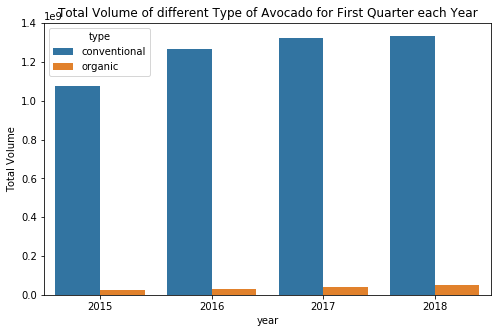

In [25]:
plt.figure(figsize=[8,5])
sns.barplot(data=df_Q1,x='year',y='Total Volume',hue='type')
plt.title('Total Volume of different Type of Avocado for First Quarter each Year')
plt.show()


* can't really see the increment. Next, try to normalize the frequency to sum to 1.

In [26]:
def norm_total(group):
    group['normed_total'] = group['Total Volume'] / group['Total Volume'].sum()
    return group

df_Q1norm = df_Q1.groupby('year').apply(norm_total)

In [27]:
df_Q1norm

,year,type,Total Volume,normed_total
0,2015,conventional,1075859426,0.978672
1,2015,organic,23445766,0.021328
2,2016,conventional,1265974189,0.977388
3,2016,organic,29289085,0.022612
4,2017,conventional,1321464239,0.969026
5,2017,organic,42238680,0.030974
6,2018,conventional,1334205761,0.964902
7,2018,organic,48531944,0.035098


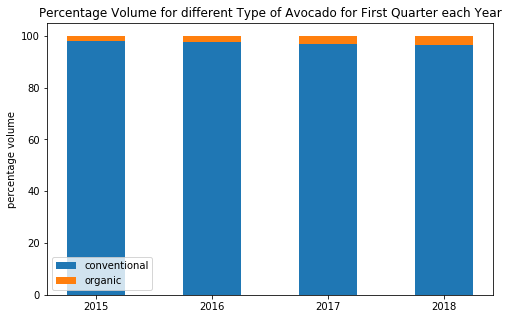

In [28]:
#sns.barplot(data=df_Q1norm,x='year',y='normed_total',hue='type')
plt.figure(figsize=[8,5])

N = 4
conv = df_Q1norm.query('type == "conventional"').normed_total*100
organic = df_Q1norm.query('type == "organic"').normed_total*100
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars

p1 = plt.bar(ind, conv, width)
p2 = plt.bar(ind, organic, width, bottom=conv)

plt.ylabel('percentage volume')
plt.title('Percentage Volume for different Type of Avocado for First Quarter each Year')
plt.xticks(ind, ('2015', '2016', '2017', '2018'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend(('conventional', 'organic'))

plt.show()


#### Price changes with time series

In [29]:
#resample the data in monthly period and aggregation like mean and standard deviation are done on the data

df_con_mean=df.query('type == "conventional"').resample('M').AveragePrice.mean()
df_org_mean=df.query('type == "organic"').resample('M').AveragePrice.mean()

df_con_std=df.query('type == "conventional"').resample('M').AveragePrice.std()
df_org_std=df.query('type == "organic"').resample('M').AveragePrice.std()




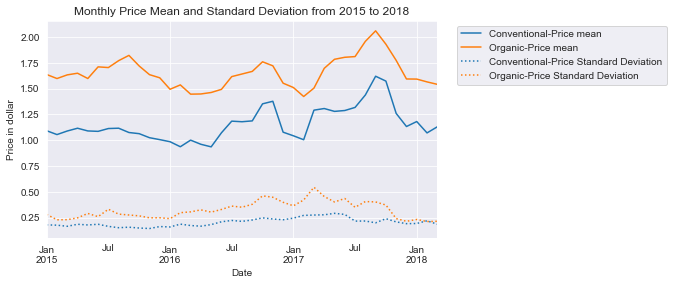

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=[7,4])
color1 = 'tab:blue'
color2 = 'tab:orange'

ax1=df_con_mean.plot(color=color1)
ax2=df_org_mean.plot(color=color2)
ax3=df_con_std.plot(color=color1, Linestyle=':')
ax4=df_org_std.plot(color=color2, Linestyle=':')

plt.legend(['Conventional-Price mean','Organic-Price mean',
            'Conventional-Price Standard Deviation','Organic-Price Standard Deviation'],
           loc='upper right', bbox_to_anchor=(1.6, 1))
plt.ylabel('Price in dollar')
plt.title('Monthly Price Mean and Standard Deviation from 2015 to 2018')


plt.show()

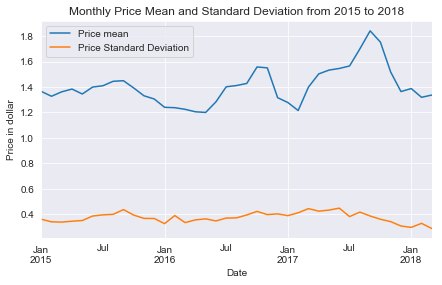

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=[7,4])
month_price_mean=df.resample('M').AveragePrice.mean()
month_price_mean.plot()

month_price_std=df.resample('M').AveragePrice.std()
month_price_std.plot()

plt.legend(['Price mean','Price Standard Deviation'])
plt.ylabel('Price in dollar')
plt.title('Monthly Price Mean and Standard Deviation from 2015 to 2018')
plt.show()

* the increase of the avocado price cause the higher fluctuation of avocado price.
* proven by looking at the graph where the spikes in price (in this case take for example those higher than 1.40 dollar) correlate with higher standard deviation(spikes on orange line for value more than 0.4).
* What interesting is that the trend is most likely repetitive in the 3rd quarter yearly. why? is it correlate with the season like summer? because the price drop at year end and beginning of the next year

#### Do people eat more avocado during summer?

In [32]:
df.resample('W')['Total Volume'].sum()

Date
2015-01-04     84674288
2015-01-11     78555753
2015-01-18     78388735
2015-01-25     76466226
2015-02-01    119453181
2015-02-08     86671053
2015-02-15     75637110
2015-02-22     80876042
2015-03-01     89434794
2015-03-08     81281613
2015-03-15     79676770
2015-03-22     87346264
2015-03-29     80843363
2015-04-05     84743030
2015-04-12     86410634
2015-04-19     89176238
2015-04-26     83814269
2015-05-03    111791789
2015-05-10     98873806
2015-05-17     86376944
2015-05-24     95346171
2015-05-31     91395066
2015-06-07     98458232
2015-06-14     99753631
2015-06-21     96342074
2015-06-28     87272596
2015-07-05    102096921
2015-07-12     85157887
2015-07-19     87136561
2015-07-26     82310289
                ...    
2017-09-03     73669192
2017-09-10     72704218
2017-09-17     70063213
2017-09-24     68342698
2017-10-01     68116389
2017-10-08     67810260
2017-10-15     69569130
2017-10-22     73958715
2017-10-29     83323183
2017-11-05     87805092
2017-11-12 

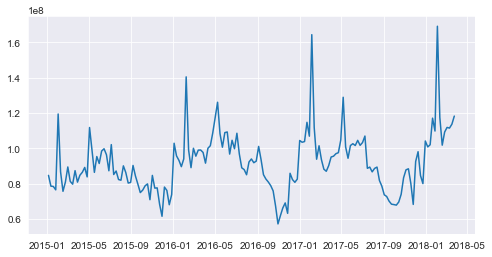

In [33]:
month_vol_sum=df.resample('W')['Total Volume'].sum()

fig, ax = plt.subplots(figsize=[8,4])
ax.plot(month_vol_sum)

plt.show()

I expected that people eat more avocados in summer(June to August) but this data doesn't show any significant increase or drop during that period. What I find interesting are the spikes, which happen annualy at end of January and continued with second spike in early May.

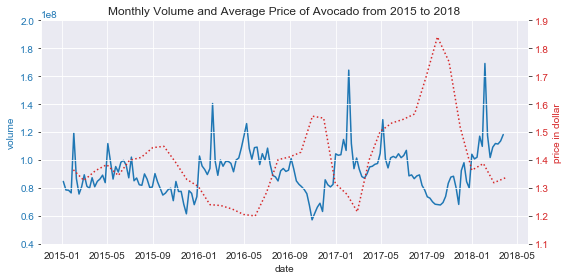

In [34]:
fig, ax1 = plt.subplots(figsize=[8,4])

color = 'tab:blue'
ax1.plot( month_vol_sum, color=color)
ax1.set_xlabel('date')
ax1.set_ylabel('volume', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axis(ymin=40000000,ymax=200000000)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.plot(month_price_mean, color=color, linestyle=':')
ax2.set_ylabel('price in dollar', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Monthly Volume and Average Price of Avocado from 2015 to 2018')
ax2.axis(ymin=1.1,ymax=1.9)

fig.tight_layout()
plt.show()

Price and volumn are not correlated with each other as we know from earlier during exploration part. However,I find it interesting that we can see for the past two years that when the demand is in the low for the yearly cycle, the price is high for that particular period which we can see between Sept-Dec 2016 and 2017.

### Conclusion

We know that organic product usually cost higher than conventional and this dataset has proved that. From our linear regression fit, a conventional avocado is predicted to cost 1.15 dollar and an organic avocado is predicted to cost 50 cent higher than that.

We also got to know how people love avocado in 2018 compare to three years back as the demand is getting higher. Overall the percentage of Hass avocado sold has increased for about 26% in first quarter 2018 compare to first quarter of 2015 and most of the sale is covered by conventional avocado yet organic avocado is getting more popularity from year to year. 

The surge of avocado price in 2018 was caused by the short supply. To avoid this, can the growers tally the higher demand in future? This might also be hard since the crop production also depends on the weather, which is something out of human's control. 

So, if you are an avocado lover, now you know when is the best time to buy avocado before it get pricey!

**Further exploration ideas:**

1. Explore the region: Which region has high demand of avocados?
2. Have they always been the top avocado consumer?
